# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+ "q=" + city + "&appid=" + weather_api_key + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
    
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | taksimo
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | darzab
Processing Record 5 of Set 1 | bodden town
Processing Record 6 of Set 1 | north platte
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | ahau
City not found. Skipping...
Processing Record 11 of Set 1 | saudarkrokur
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | anadyr
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | pampa
Processing Record 16 of Set 1 | solone
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | tsiombe
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | sand spr

In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,6.39,77,72,4.88,CL,1720091050
1,taksimo,56.3444,114.8794,23.68,68,94,1.88,RU,1720091460
2,port mathurin,-19.6833,63.4167,22.28,67,29,9.89,MU,1720090946
3,darzab,35.9774,65.3783,34.19,11,39,4.46,AF,1720091463
4,bodden town,19.2833,-81.2500,25.00,96,75,19.55,KY,1720091464


In [66]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,6.39,77,72,4.88,CL,1720091050
1,taksimo,56.3444,114.8794,23.68,68,94,1.88,RU,1720091460
2,port mathurin,-19.6833,63.4167,22.28,67,29,9.89,MU,1720090946
3,darzab,35.9774,65.3783,34.19,11,39,4.46,AF,1720091463
4,bodden town,19.2833,-81.2500,25.00,96,75,19.55,KY,1720091464


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

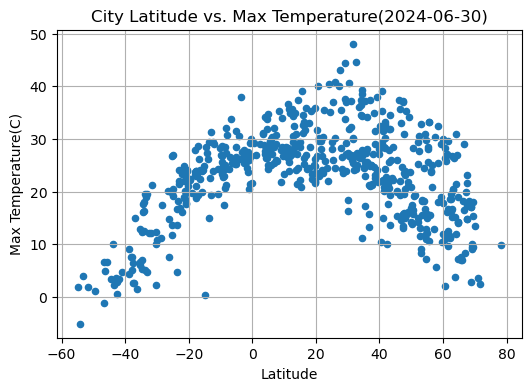

In [54]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp",figsize=(6,4),grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude vs. Max Temperature(2024-06-30)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

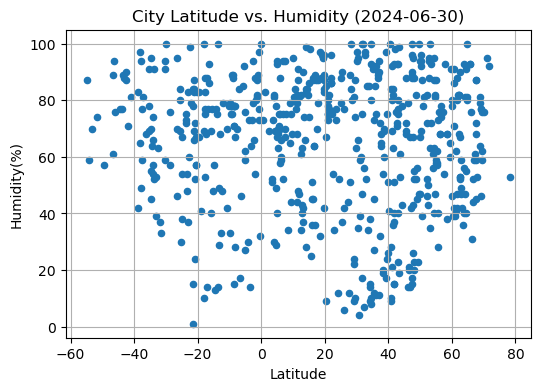

In [56]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity",figsize=(6,4),grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (2024-06-30)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

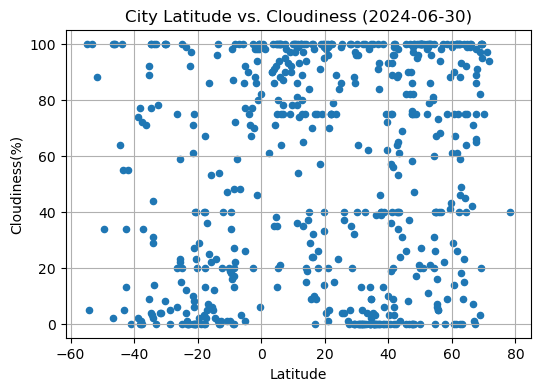

In [58]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness",figsize=(6,4),grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (2024-06-30)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

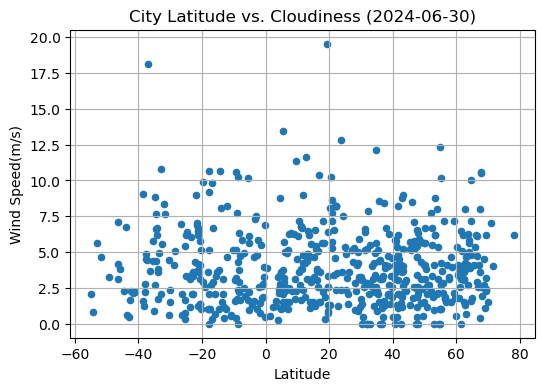

In [60]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed",figsize=(6,4),grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs. Cloudiness (2024-06-30)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_linregress(x,y,xlabel="X",ylabel="Y"):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    fit_line = slope * x + intercept
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y)
    plt.plot(x, fit_line, color='red')
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.text(np.mean(x),np.min(y),line,fontsize=14,color="red")
    print(f"The r^2-value is: {r_value}")


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0,:]
northern_hemi_df = northern_hemi_df.reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taksimo,56.3444,114.8794,23.68,68,94,1.88,RU,1720091460
1,darzab,35.9774,65.3783,34.19,11,39,4.46,AF,1720091463
2,bodden town,19.2833,-81.2500,25.00,96,75,19.55,KY,1720091464
3,north platte,41.1239,-100.7654,15.06,92,75,3.60,US,1720091309
4,saudarkrokur,65.7461,-19.6394,7.56,93,99,5.37,IS,1720091474


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0,:]
southern_hemi_df = southern_hemi_df.reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,6.39,77,72,4.88,CL,1720091050
1,port mathurin,-19.6833,63.4167,22.28,67,29,9.89,MU,1720090946
2,port-aux-francais,-49.3500,70.2167,1.18,57,34,3.28,TF,1720091190
3,carnarvon,-24.8667,113.6333,19.07,38,0,6.42,AU,1720091469
4,waitangi,-43.9535,-176.5597,9.99,77,100,6.72,NZ,1720091174


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.5643013682424779


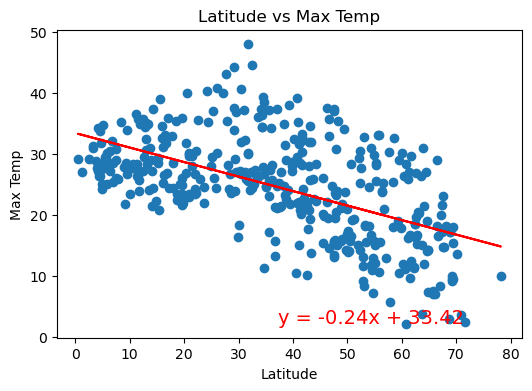

In [36]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r^2-value is: 0.8452307725404266


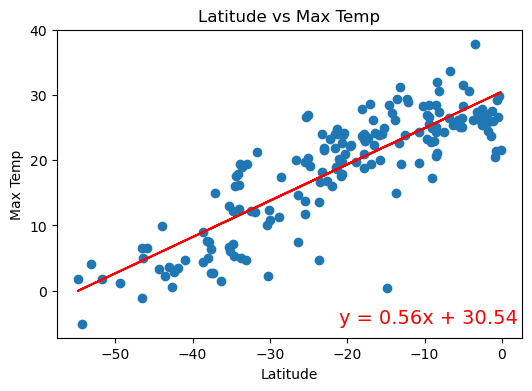

In [38]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 

For the Northern Hemisphere, the relationship between latitude and max temperature shows negative correlation. Compared to the Northern Hemisphere, the Southern Hemisphere shows a higher correlation, as indicated by the r-value, demonstrating a strong positive relationship between latitude and max temperature in the Southern Hemisphere. And the positive slope (0.56) indicates that temperatures generally increase as you move closer to the equator in the Southern Hemisphere. The negative slope (-0.24) suggests that temperatures decrease as you move away from the equator towards higher latitudes in the Northern Hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.04164896432258663


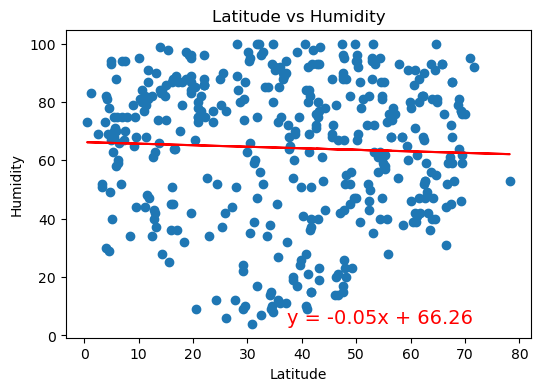

In [40]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r^2-value is: -0.08757611485760146


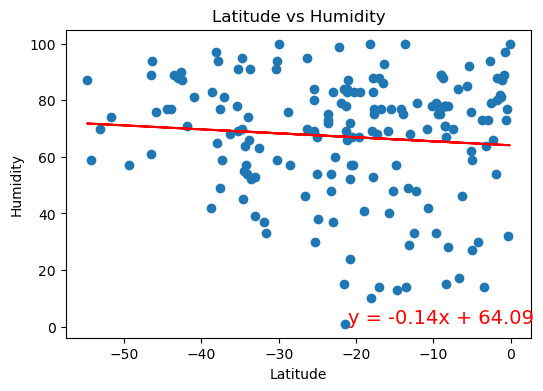

In [42]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 

Both Northern Hemisphere and Southern Hemisphere shows weak negative correlation between latitude and humidity. And the slopes of the linear relationship are small as well. This suggests that humidity is influenced to a lesser extent by latitude. Other factors, such as altitude and ocean currents, may play more significant roles in affecting humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.08290161507053874


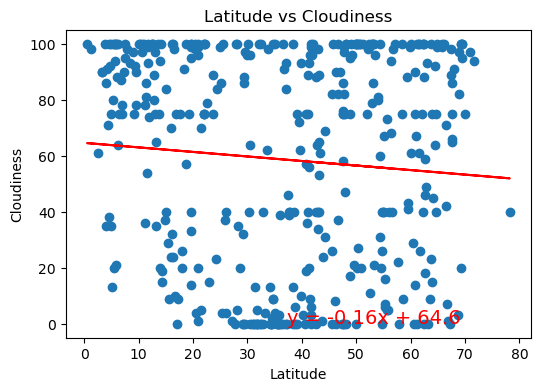

In [44]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r^2-value is: 0.05084230709913404


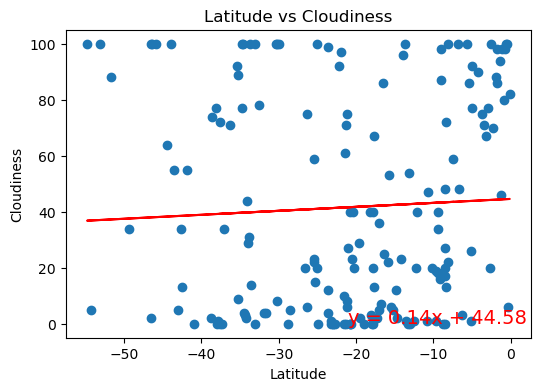

In [46]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 

The negative r-value suggests a weak negative correlation between latitude and cloudiness in the Northern Hemisphere.The slope of -0.16 further supports this weak relationship, indicating that as latitude increases, there is a slight decrease in cloudiness in Northern Hemisphere.
In contrast, the Southern Hemisphere shows a similarly weak positive correlation between latitude and cloudiness.The positive slope of 0.14 indicates that as you move decreasing latitude, there is a slight increase in cloudiness. The overall weak correlations imply that latitude is not a decisive factor in cloudiness variability.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.027717434184711533


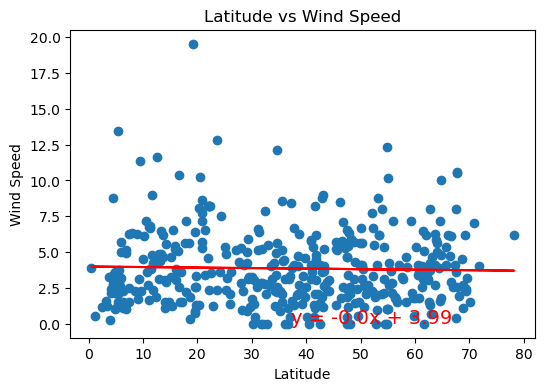

In [48]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r^2-value is: -0.059624140837676254


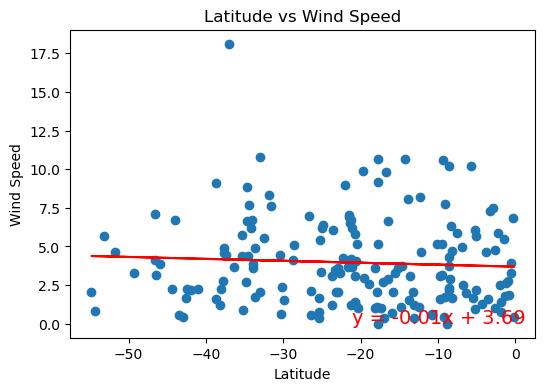

In [50]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 

The plots suggest that latitude has a minimal influence on wind speed variability in both hemispheres.A slope of 0 suggests that there is no apparent linear relationship between latitude and wind speed in Northern Hemisphere. And the r-value is very small as well that indicates an extremely weak correlation between latitude and wind speed. In the Southern Hemisphere, the r-value of -0.059 suggests a weak negative correlation between latitude and wind speed as well.Both analysis indicate that latitude alone does not significantly predict wind speed.